# Milestore 2

## Task C:
- Cursory (initial) analysis – Kushal 
    - NULL counts 
    - Panel (pair) plots 
    - Relationship within variables
    - Approach 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os

In [2]:
import warnings
warnings.filterwarnings(action="ignore")

In [3]:
# dir paths
DATA_DIR = '../data/'
RESULT_DIR = '../results/'

#### Read the dataset

In [4]:
# read dataset using pandas
raw_data = pd.read_csv(os.path.join(DATA_DIR, 'Food_Inspections.csv'), parse_dates=True)

In [5]:
raw_data.head(5)

Inspection ID                         DBA Name                 AKA Name  \
0        2571417                M K POULTRY, INC.        M K POULTRY, INC.   
1        2571362                    FIRST ACADEMY            FIRST ACADEMY   
2        2571314  Northwest Middle/Belmont-Cragin  Northwest Middle School   
3        2571261                        SALT SHED                SALT SHED   
4        2571260                     M & A BAKERY                 M BAKERY   

   License #                 Facility Type             Risk  \
0  1959029.0                 Grocery Store  Risk 2 (Medium)   
1  2501698.0  Children's Services Facility    Risk 1 (High)   
2    41121.0                        School    Risk 1 (High)   
3  2877078.0                   MUSIC VENUE     Risk 3 (Low)   
4  1382540.0                        Bakery    Risk 1 (High)   

                      Address     City State      Zip Inspection Date  \
0             2600 W 51ST ST   CHICAGO    IL  60632.0      02/17/2023   
1  2523-2525  W PETERSON AVE   CHICAGO    IL  60659.0      02/16/2023   
2              5252 W Palmer   CHICAGO    IL  60639.0      02/16/2023   
3          1357 N ELSTON AVE   CHICAGO    IL  60642.0      02/15/2023   
4        1527 W LAWRENCE AVE   CHICAGO    IL  60640.0      02/15/2023   

         Inspection Type          Results  \
0              Complaint             Fail   
1                License             Pass   
2                Canvass             Pass   
3  License Re-Inspection             Pass   
4                Canvass  Out of Business   

                                          Violations   Latitude  Longitude  \
0  1. PERSON IN CHARGE PRESENT, DEMONSTRATES KNOW...  41.801181 -87.689185   
1                                                NaN  41.990367 -87.693163   
2                                                NaN  41.920538 -87.758200   
3  38. INSECTS, RODENTS, & ANIMALS NOT PRESENT - ...  41.907049 -87.659765   
4                                                NaN  41.968773 -87.668624   

                                   Location  
0  (41.801181282541556, -87.68918531154972)  
1    (41.99036720731882, -87.6931633926933)  
2  (41.920538446762095, -87.75820002999474)  
3    (41.90704947171354, -87.6597649708448)  
4    (41.96877279428135, -87.6686244081723)

In [6]:
raw_data.tail()

Inspection ID                  DBA Name                  AKA Name  \
249636         120371              FALCOZ GROUP             AL'S RED HOTS   
249637         160277    STARBUCKS COFFEE #2412    STARBUCKS COFFEE #2412   
249638          67924             FRANK FOOD #4             FRANK FOOD #4   
249639          88296  SWIFT  ELEMENTARY SCHOOL  SWIFT  ELEMENTARY SCHOOL   
249640          68148                   MORRILL                   MORRILL   

        License #  Facility Type             Risk  \
249636  1645128.0     Restaurant  Risk 2 (Medium)   
249637    23132.0     Restaurant  Risk 2 (Medium)   
249638  1767467.0  Grocery Store     Risk 3 (Low)   
249639    25571.0         School    Risk 1 (High)   
249640    24571.0         School    Risk 1 (High)   

                             Address     City State      Zip Inspection Date  \
249636               2908 W LAKE ST   CHICAGO    IL  60612.0      03/05/2010   
249637          1229 N CLYBOURN AVE   CHICAGO    IL  60610.0      02/24/2010   
249638            1819 S KEDZIE AVE   CHICAGO    IL  60623.0      01/19/2010   
249639          5900 N Winthrop AVE   CHICAGO    IL  60660.0      03/16/2010   
249640  6011 S Rockwell (2600W) AVE   CHICAGO    IL  60629.0      02/04/2010   

       Inspection Type Results  \
249636       Complaint    Fail   
249637         Canvass    Pass   
249638       Complaint    Fail   
249639         Canvass    Pass   
249640         Canvass    Pass   

                                               Violations   Latitude  \
249636  18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...  41.884248   
249637  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...  41.904473   
249638  18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...  41.857141   
249639  34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...  41.989157   
249640  32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...        NaN   

        Longitude                                 Location  
249636 -87.699266  (41.88424820966617, -87.69926640072916)  
249637 -87.640334  (41.90447254385478, -87.64033362435434)  
249638 -87.705261  (41.85714095488576, -87.70526116851221)  
249639 -87.658333  (41.98915734238827, -87.65833342161731)  
249640        NaN                                      NaN

In [7]:
raw_data.columns

Index(['Inspection ID', 'DBA Name', 'AKA Name', 'License #', 'Facility Type',
       'Risk', 'Address', 'City', 'State', 'Zip', 'Inspection Date',
       'Inspection Type', 'Results', 'Violations', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [8]:
raw_data.columns = [column_name.replace(' ', '_').lower() for column_name in raw_data.columns]

In [9]:
raw_data.dtypes

inspection_id        int64
dba_name            object
aka_name            object
license_#          float64
facility_type       object
risk                object
address             object
city                object
state               object
zip                float64
inspection_date     object
inspection_type     object
results             object
violations          object
latitude           float64
longitude          float64
location            object
dtype: object

In [10]:
raw_data['inspection_date'] = pd.to_datetime(raw_data.inspection_date)

In [11]:
raw_data.inspection_date.sample(3)

247576   2010-03-04
208936   2012-08-10
220812   2011-11-01
Name: inspection_date, dtype: datetime64[ns]

Filter data for 2022 only.

In [12]:
food_fltrd = raw_data[(raw_data.inspection_date>='2022-01-01') & (raw_data.inspection_date<='2022-12-31')]

In [13]:
food_fltrd.inspection_date.min(), food_fltrd.inspection_date.max()

(Timestamp('2022-01-03 00:00:00'), Timestamp('2022-12-30 00:00:00'))

In [14]:
food_fltrd.shape

(16933, 17)

#### Exploratory analysis

In [15]:
food_fltrd.head()

inspection_id                 dba_name               aka_name  license_#  \
202        2569111           SUBWAY # 26771                 SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797              STARBUCKS  2341106.0   
204        2569116               MCDONALD'S             MCDONALD'S  1332913.0   
205        2569090          TACOS VELAZQUEZ        TACOS VELAZQUEZ  2886589.0   
206        2569079    KANELA BREAKFAST CLUB  KANELA BREAKFAST CLUB  2882663.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   
204    Restaurant  Risk 2 (Medium)   2609 S KEDZIE AVE   CHICAGO    IL   
205           NaN    Risk 1 (High)   1729 N CICERO AVE   CHICAGO    IL   
206    Restaurant    Risk 1 (High)     1549 N WELLS ST   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   
204  60623.0      2022-12-30                Canvass    Pass   
205  60639.0      2022-12-29                License    Fail   
206  60610.0      2022-12-29                License    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
205                                                NaN  41.912331 -87.745792   
206                                                NaN  41.910572 -87.634545   

                                     location  
202   (41.87679468592167, -87.62899906139144)  
203   (41.94794732437379, -87.68844043392538)  
204    (41.84420224098303, -87.7048869943916)  
205   (41.91233128070664, -87.74579209447246)  
206  (41.910572111162736, -87.63454539156992)

In [16]:
food_fltrd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16933 entries, 202 to 51019
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   inspection_id    16933 non-null  int64         
 1   dba_name         16933 non-null  object        
 2   aka_name         16885 non-null  object        
 3   license_#        16933 non-null  float64       
 4   facility_type    16826 non-null  object        
 5   risk             16927 non-null  object        
 6   address          16933 non-null  object        
 7   city             16899 non-null  object        
 8   state            16930 non-null  object        
 9   zip              16905 non-null  float64       
 10  inspection_date  16933 non-null  datetime64[ns]
 11  inspection_type  16933 non-null  object        
 12  results          16933 non-null  object        
 13  violations       11777 non-null  object        
 14  latitude         16863 non-null  flo

In [17]:
food_fltrd.describe().T

count          mean            std           min  \
inspection_id  16933.0  2.559381e+06    6432.876115  2.535216e+06   
license_#      16933.0  2.092075e+06  923016.228694  0.000000e+00   
zip            16905.0  6.062632e+04     190.714733  4.639400e+04   
latitude       16863.0  4.187992e+01       0.080314  4.164864e+01   
longitude      16863.0 -8.767493e+01       0.055850 -8.791443e+01   

                        25%           50%           75%           max  
inspection_id  2.554342e+06  2.560601e+06  2.564857e+06  2.570202e+06  
license_#      1.904287e+06  2.438111e+06  2.738649e+06  4.073900e+06  
zip            6.061300e+04  6.062500e+04  6.064200e+04  6.082700e+04  
latitude       4.183159e+01  4.189099e+01  4.193819e+01  4.202106e+01  
longitude     -8.770543e+01 -8.766480e+01 -8.763481e+01 -8.752665e+01

In [18]:
food_fltrd.head()

inspection_id                 dba_name               aka_name  license_#  \
202        2569111           SUBWAY # 26771                 SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797              STARBUCKS  2341106.0   
204        2569116               MCDONALD'S             MCDONALD'S  1332913.0   
205        2569090          TACOS VELAZQUEZ        TACOS VELAZQUEZ  2886589.0   
206        2569079    KANELA BREAKFAST CLUB  KANELA BREAKFAST CLUB  2882663.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   
204    Restaurant  Risk 2 (Medium)   2609 S KEDZIE AVE   CHICAGO    IL   
205           NaN    Risk 1 (High)   1729 N CICERO AVE   CHICAGO    IL   
206    Restaurant    Risk 1 (High)     1549 N WELLS ST   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   
204  60623.0      2022-12-30                Canvass    Pass   
205  60639.0      2022-12-29                License    Fail   
206  60610.0      2022-12-29                License    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   
204  49. NON-FOOD/FOOD CONTACT SURFACES CLEAN - Com...  41.844202 -87.704887   
205                                                NaN  41.912331 -87.745792   
206                                                NaN  41.910572 -87.634545   

                                     location  
202   (41.87679468592167, -87.62899906139144)  
203   (41.94794732437379, -87.68844043392538)  
204    (41.84420224098303, -87.7048869943916)  
205   (41.91233128070664, -87.74579209447246)  
206  (41.910572111162736, -87.63454539156992)

In [19]:
food_fltrd.aka_name.value_counts()

SUBWAY                                275
DUNKIN DONUTS                         106
7-ELEVEN                               62
MCDONALD'S                             60
WENDY'S                                44
                                     ... 
DR. EFFIE O. ELLIS YMCA HEAD START      1
UNIVERSAL FRUIT MARKET                  1
MANGI'S                                 1
MIDDLE BROW                             1
TEN CAFE                                1
Name: aka_name, Length: 8962, dtype: int64

#### Count NULLs in each column

In [20]:
100*(food_fltrd.isna().sum()/food_fltrd.shape[0])

inspection_id       0.000000
dba_name            0.000000
aka_name            0.283470
license_#           0.000000
facility_type       0.631902
risk                0.035434
address             0.000000
city                0.200791
state               0.017717
zip                 0.165358
inspection_date     0.000000
inspection_type     0.000000
results             0.000000
violations         30.449418
latitude            0.413394
longitude           0.413394
location            0.413394
dtype: float64

In [21]:
cnt_data = pd.DataFrame(100*(food_fltrd.isna().sum()/food_fltrd.shape[0]), columns=['null_counts'])

In [22]:
cnt_data.null_counts = cnt_data.null_counts.round(1)

In [23]:
cnt_data.sort_values("null_counts", ascending=False, inplace=True)

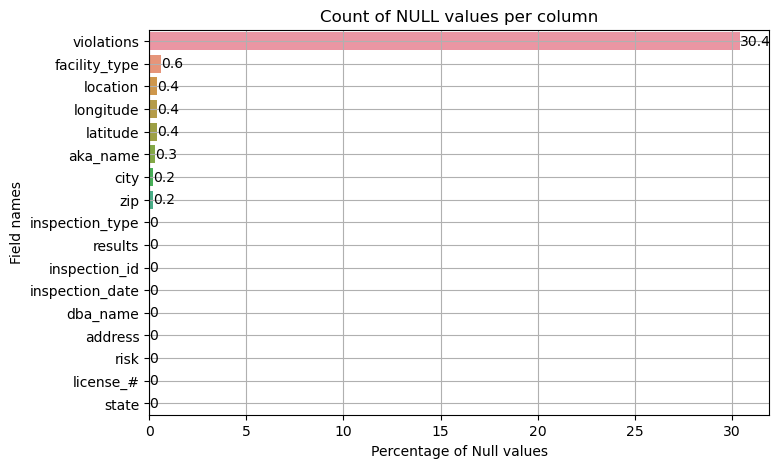

In [24]:
plt.figure(figsize=(8, 5))
ax = sns.barplot(data = cnt_data, y = cnt_data.index, x = 'null_counts')
ax.set(xlabel ="Percentage of Null values", ylabel = "Field names", title ='Count of NULL values per column')
ax.bar_label(ax.containers[0])
plt.grid()

Column 'violations' has highest number of NULL percentage (~30%)

In [25]:
# top 20 restaurants
top_10 = list(food_fltrd.aka_name.value_counts()[:20].index)

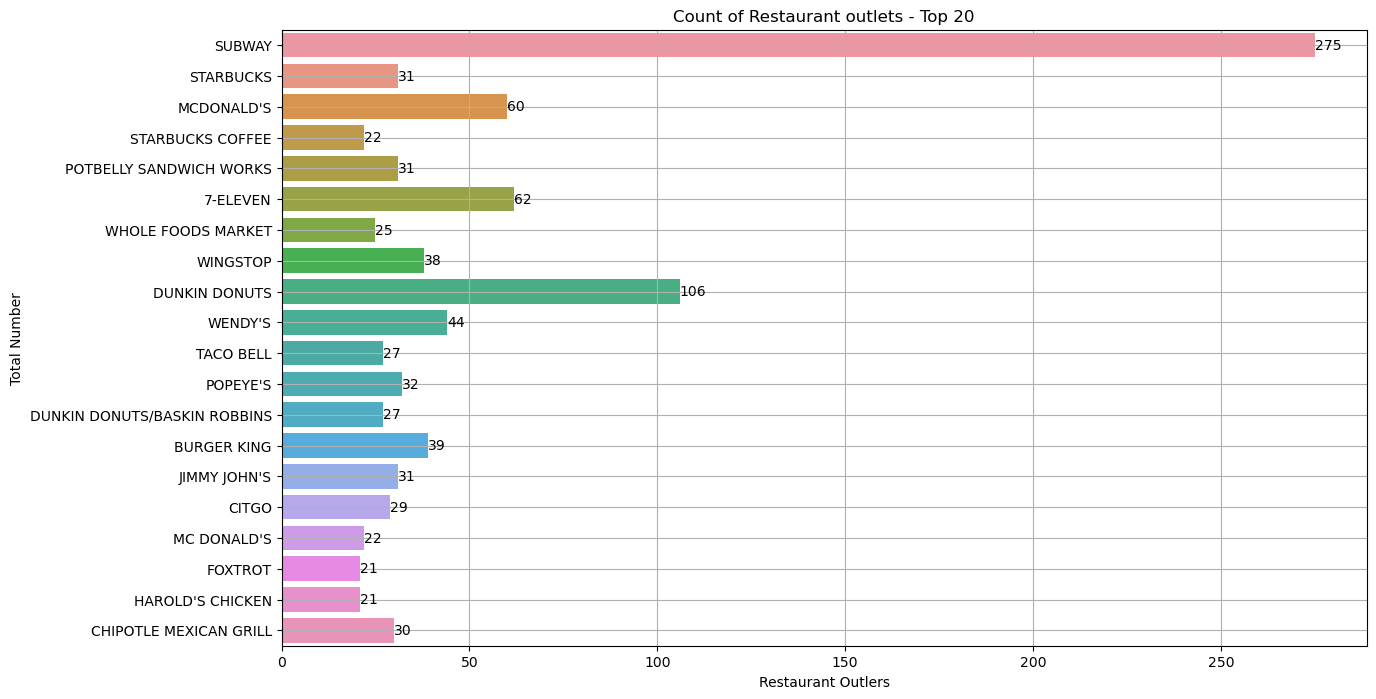

In [26]:
plt.figure(figsize=(14, 8))
plt_1 = sns.countplot(y = 'aka_name', data = food_fltrd[food_fltrd.aka_name.isin(top_10)], orient='v')
plt_1.bar_label(plt_1.containers[0])
plt_1.set(xlabel ="Restaurant Outlers", ylabel = "Total Number", title ='Count of Restaurant outlets - Top 20')
plt.grid()

Uh-oh! Few of the restaurant names are similar. Best way to handle is to merge them together.

In [27]:
food_fltrd.head(2)

inspection_id                 dba_name   aka_name  license_#  \
202        2569111           SUBWAY # 26771     SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797  STARBUCKS  2341106.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   

                                    location  
202  (41.87679468592167, -87.62899906139144)  
203  (41.94794732437379, -87.68844043392538)

In [28]:
food_fltrd.facility_type.value_counts()

Restaurant                         11812
Grocery Store                       1670
School                              1158
Children's Services Facility         537
Daycare Above and Under 2 Years      256
                                   ...  
SENIOR DAY CARE                        1
Assisted Living Senior Care            1
MOVIE THEATRE                          1
CATERING/BANQUET                       1
DAYCARE 2 YRS TO 12 YRS                1
Name: facility_type, Length: 132, dtype: int64

In [29]:
# top 20 facility types
facilty_20 = list(food_fltrd.facility_type.value_counts()[:20].index)

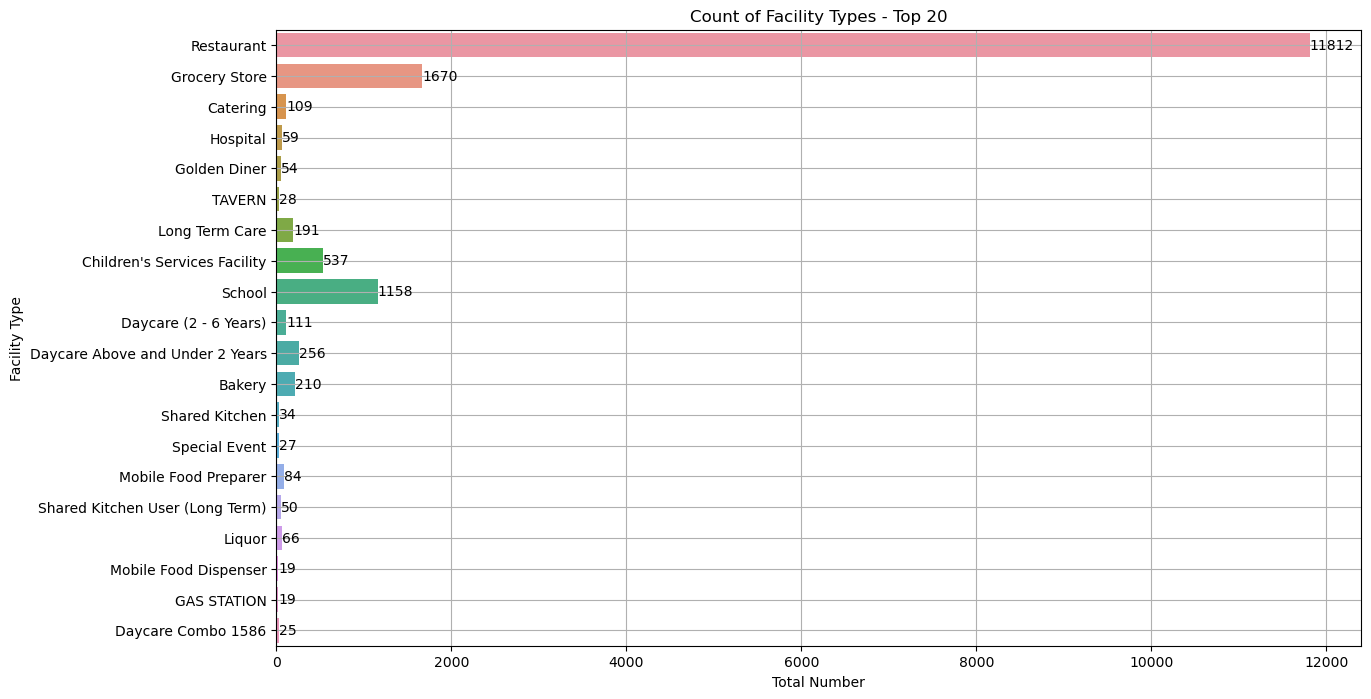

In [30]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(y = 'facility_type', data = food_fltrd[food_fltrd.facility_type.isin(facilty_20)])
ax.bar_label(ax.containers[0])
ax.set(xlabel ="Total Number", ylabel = "Facility Type", title ='Count of Facility Types - Top 20')
plt.grid()

In [31]:
food_fltrd.risk.value_counts()

Risk 1 (High)      13265
Risk 2 (Medium)     2682
Risk 3 (Low)         965
All                   15
Name: risk, dtype: int64

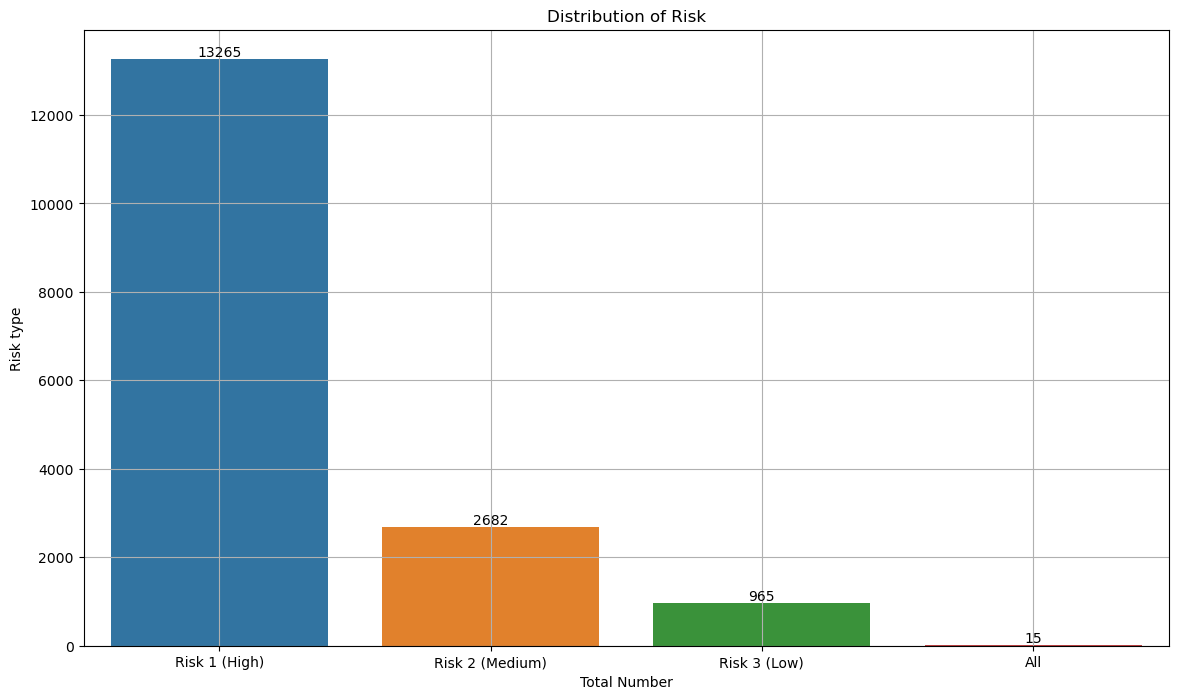

In [32]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(x = 'risk', data = food_fltrd)
ax.bar_label(ax.containers[0])
ax.set(xlabel ="Total Number", ylabel = "Risk type", title ='Distribution of Risk')
plt.grid()

In [33]:
food_fltrd['city'] = np.where(food_fltrd.city.str.contains('CHICAGO|Chicago|chicago|CHicago', regex=True, na=False), 'CHICAGO', 
                             food_fltrd.city)

In [34]:
food_fltrd.city.value_counts()

CHICAGO        16887
EVANSTON           3
MERRIVILLE         2
OAK PARK           2
BERWYN             1
GLEN ELLYN         1
SUMMIT             1
WHITING            1
LAKE ZURICH        1
Name: city, dtype: int64

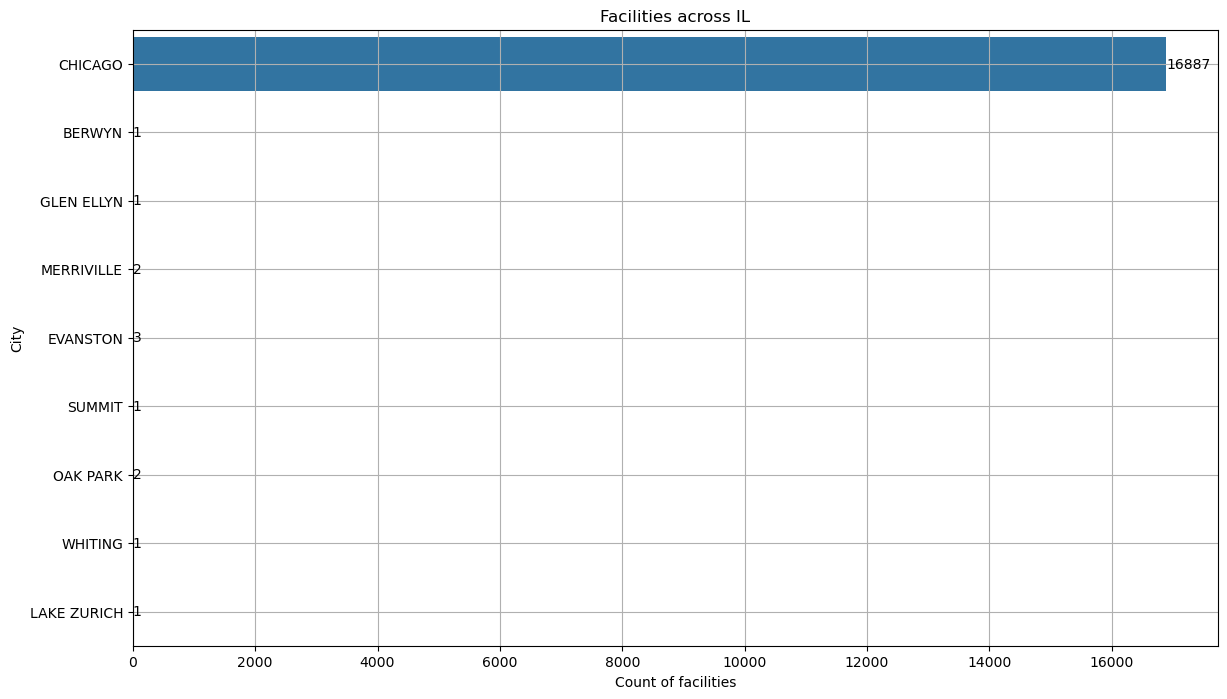

In [35]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(y = 'city', data = food_fltrd)
ax.bar_label(ax.containers[0])
ax.set(xlabel ="Count of facilities", ylabel = "City", title ='Facilities across IL')
plt.grid()

<Figure size 2000x2000 with 0 Axes>

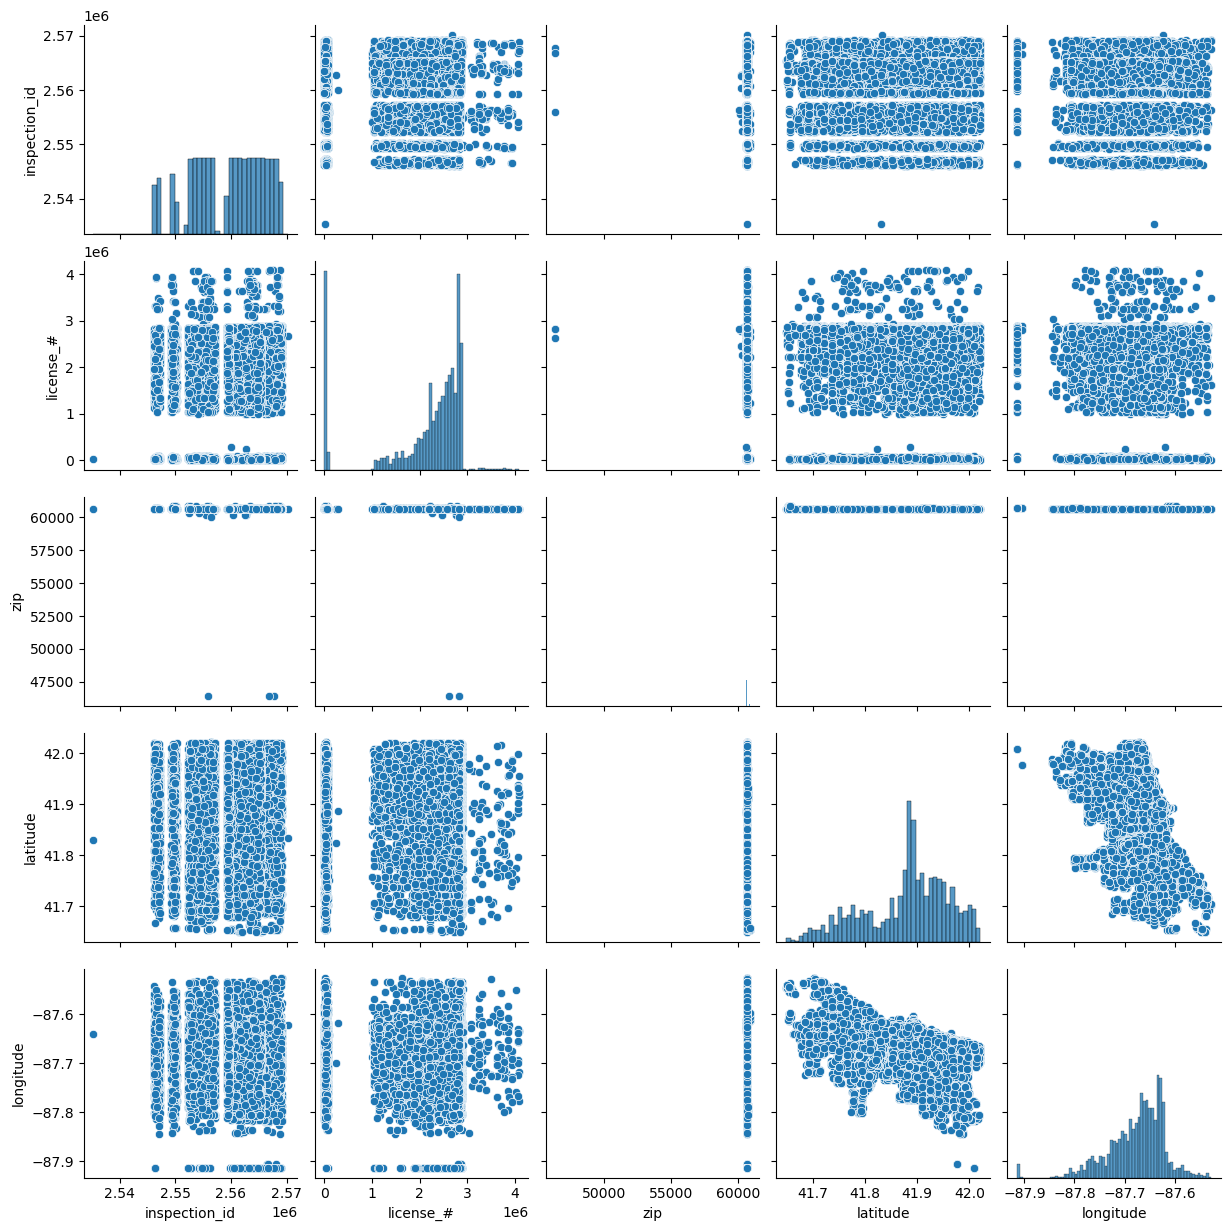

In [36]:
plt.figure(figsize=(20, 20))
sns.pairplot(data = food_fltrd)

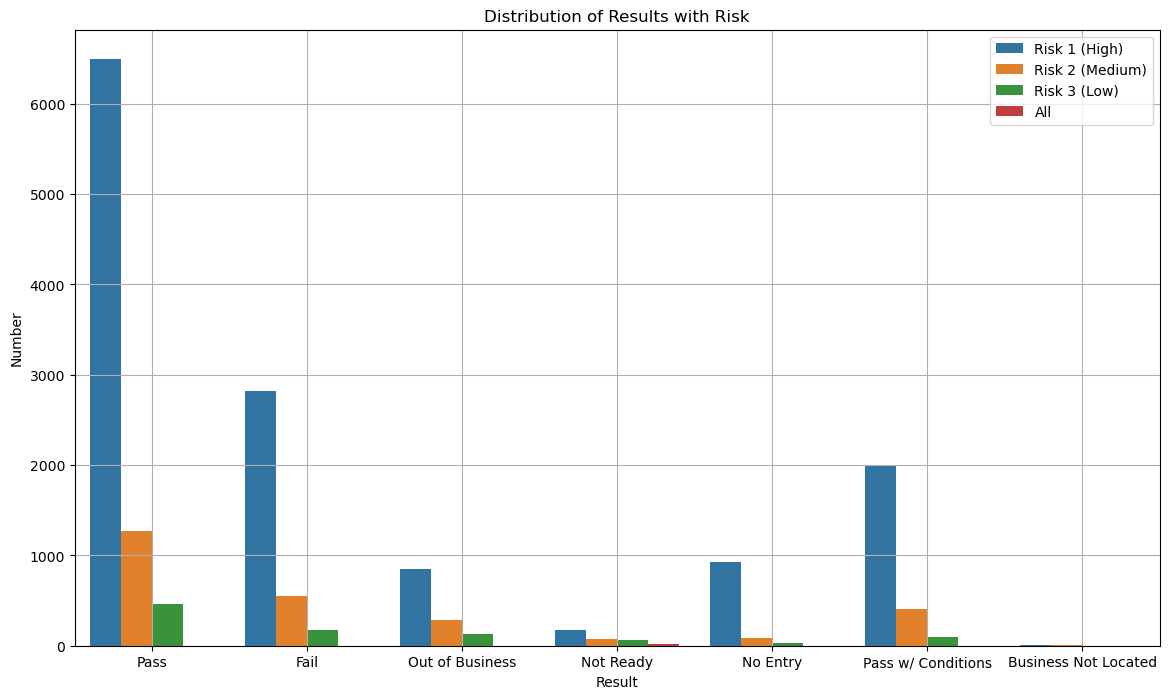

In [37]:
plt.figure(figsize = (14, 8))
ax = sns.countplot(x = 'results', data = food_fltrd, hue="risk")
# ax.bar_label(ax.containers[0])
ax.set(xlabel ="Result", ylabel = "Number", title ='Distribution of Results with Risk')
ax.legend(loc = "upper right")
plt.grid()

In [38]:
food_fltrd.head(2)

inspection_id                 dba_name   aka_name  license_#  \
202        2569111           SUBWAY # 26771     SUBWAY  2458696.0   
203        2569114  STARBUCKS COFFEE #20797  STARBUCKS  2341106.0   

    facility_type             risk              address     city state  \
202    Restaurant    Risk 1 (High)   35 W VAN BUREN ST   CHICAGO    IL   
203    Restaurant  Risk 2 (Medium)  3640 N WESTERN AVE   CHICAGO    IL   

         zip inspection_date        inspection_type results  \
202  60605.0      2022-12-29  Canvass Re-Inspection    Pass   
203  60618.0      2022-12-30                Canvass    Pass   

                                            violations   latitude  longitude  \
202                                                NaN  41.876795 -87.628999   
203  57. ALL FOOD EMPLOYEES HAVE FOOD HANDLER TRAIN...  41.947947 -87.688440   

                                    location  
202  (41.87679468592167, -87.62899906139144)  
203  (41.94794732437379, -87.68844043392538)

In [39]:
food_fltrd.inspection_type.value_counts()

Canvass                                   7956
License                                   2315
Canvass Re-Inspection                     2166
Complaint                                 1873
Complaint Re-Inspection                    847
Non-Inspection                             774
License Re-Inspection                      561
Short Form Complaint                       360
Recent Inspection                           35
Suspected Food Poisoning                    35
Suspected Food Poisoning Re-inspection       8
Not Ready                                    2
Special Events (Festivals)                   1
Name: inspection_type, dtype: int64

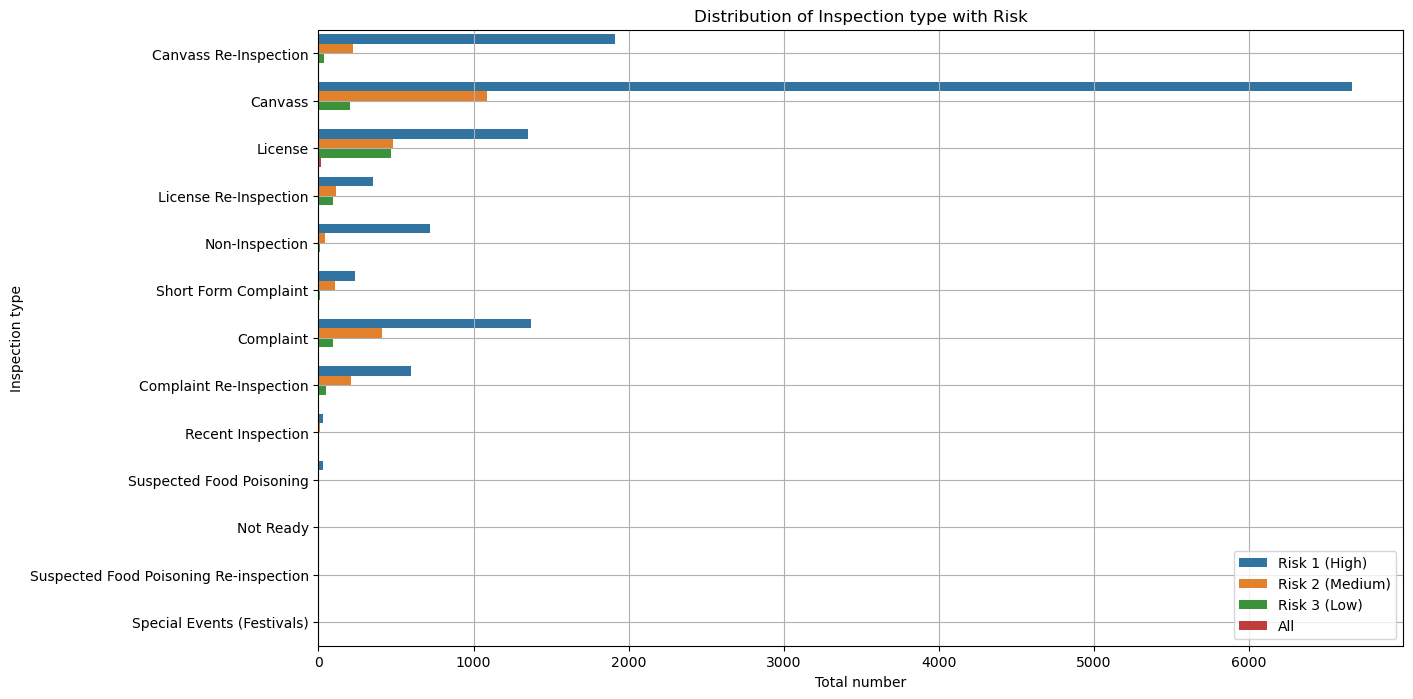

In [40]:
plt.figure(figsize=(14, 8))
ax = sns.countplot(y= "inspection_type", data = food_fltrd, hue = 'risk')
plt.grid()
ax.set(xlabel ="Total number", ylabel = "Inspection type", title ='Distribution of Inspection type with Risk')
ax.legend(loc='lower right')

#### Geographic viz

In [41]:
geo_df = food_fltrd.dropna(axis=0, subset=['latitude', 'longitude'])

In [42]:
import folium
from folium import plugins

In [43]:
map_attributions = ('&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> '
        'contributors, &copy; <a href="http://cartodb.com/attributions">CartoDB</a>')

In [44]:
heatmap = folium.Map(location=[41.85, -87.68],
                         control_scale=True,
                     tiles='Cartodb Positron', 
                     attr = map_attributions,
                         zoom_start=10)

In [45]:
point_tuples = zip(geo_df.latitude, geo_df.longitude)

In [46]:
points = [[la, lo] for la, lo in point_tuples]

In [47]:
cluster = plugins.HeatMap(data=points,
                              name="heatmap",
              gradient={.4: 'blue', .65: 'lime', 1: 'red'},
                              radius=10)

In [48]:
heatmap.add_children(cluster)

In [49]:
heatmap.save(os.path.join(RESULT_DIR, "InspectionCountHeatmap_2022.html"))